In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt                                                                                
import random 

# Seed 
random.seed(10)


size = 50 # No. de Clientes
l = 1 # Promedio de llegadas por minuto
µ =0.8 # promedio de personas atendidas por minuto

# Serie de clientes
Cliente = [i for i in range(1,size+1)]

# Tiempo entre llegadas
T_entre_Llegadas = list(np.random.exponential(scale=1/l,size=size))

# Tiempo de Servicio
T_de_Servicio = list(np.random.exponential(scale=1/µ,size=size))

print(len(T_entre_Llegadas),len(T_de_Servicio))

# Calcular tiempo de llegada
T_llegada = [0 for i in range(size)]

# Inicial
T_llegada[0] = round(T_entre_Llegadas[0],2)

for i in range(1,size):
  T_llegada[i] = round((T_entre_Llegadas[i]+T_llegada[i-1]),2)
 

Inicio_T_servicio = [0 for i in range(size)]
T_Espera_en_Cola = [0 for i in range(size)]
Final_T_Servicio = [0 for i in range(size)]
T_Cliente_en_Sistema = [0 for i in range(size)]
Sistema_libre = [0 for i in range(size)]

Inicio_T_servicio[0] = round((T_llegada[0]),2)
Final_T_Servicio[0] = round((T_de_Servicio[0]),2)
T_Cliente_en_Sistema[0] = round(T_de_Servicio[0],2)

for i in range(1,size):
  # Inincio Tiempo de Servicio 
  Inicio_T_servicio[i] = round(max(T_llegada[i],Final_T_Servicio[i-1]),2)

  # Tiempo de Espera en la Cola  
  T_Espera_en_Cola[i] = round(Inicio_T_servicio[i]-T_llegada[i],2)

  # Tiempo en que Servicio Termina
  Final_T_Servicio[i] = round(Inicio_T_servicio[i] + T_de_Servicio[i],2)  

  # Tiempo que el Cliente Gasto en el Sistema
  T_Cliente_en_Sistema[i] = round(Final_T_Servicio[i] - T_llegada[i],2)

  # Tiempo sistema permanece libre
  if (T_llegada[i]>Final_T_Servicio[i-1]):
    Sistema_libre[i] = round(T_llegada[i]-Final_T_Servicio[i-1],2)
  else:
    Sistema_libre[i] = 0 
    
#Tabla

from prettytable import PrettyTable

x = PrettyTable()

T_entre_Llegadas_G=[0 for i in range(size)]
T_de_Servicio_G=[0 for i in range(size)]

for i in range(0,size):
  T_entre_Llegadas_G[i] = round(T_entre_Llegadas[i],2)
  T_de_Servicio_G[i]= round(T_de_Servicio[i],2)

column_names = ['Cliente','TEL','TL','TS','ITS','TEEC','FTS','TCES','Sistema_libre']
data = [Cliente,T_entre_Llegadas_G,T_llegada,T_de_Servicio_G, Inicio_T_servicio, T_Espera_en_Cola, Final_T_Servicio, T_Cliente_en_Sistema,Sistema_libre]

length = len(column_names)

for i in range(length):
  x.add_column(column_names[i],data[i])
  
print(x)

'''
Medida de rendimiento

Tiempo medio de espera  = Tiempo Total de Espera en la Cola / Numero Total de Clientes
 
Probabilidad de que el cliente estuviera esperando = Numero de Clientes que Esperan / Total Numero de Clientes
 
Probabilidad de servidor inactivo =  Total Tiempo Servidor Inactivo /  Tiempo total de la Ejecucion del Sistema
 
Tiempo medio entre llegada = Sum Entre todos los Tiempos entre Llegadas / Numero de Llegadas - 1 
 
Tiempo medio de espera de los que esperan = Tiempo Total de Espera en la Cola / Total no. de Clientes que Esperan
 
Tiempo promedio de permanencia del cliente en el sistema  = Tiempo Total que los Clientes Esperaron en el Sistema / Total no. de Clientes 
'''

# Tiempo medio de espera 
T_medio_de_Espera = sum(T_Espera_en_Cola)/size 

# Probabilidad de que el cliente estuviera esperando
N_Clientes_que_Esperan = len(list(filter(lambda x:x>0,T_Espera_en_Cola)))

Prob_Cliente_Esperando = N_Clientes_que_Esperan  / size

# Tiempo medio de servicio
T_medio_de_Servicio = sum(T_de_Servicio)/size

# Probabilidad de servidor inactivo
Prob_Servidor_Inactivo = sum(Sistema_libre) / Final_T_Servicio[size-1]  

# Tiempo medio entre llegada
T_Medio_Entre_Llegadas = T_llegada[size-1] / (len(T_llegada) - 1)

# Tiempo medio de espera de los que esperan
T_medio_de_Espera = sum(T_Espera_en_Cola) / N_Clientes_que_Esperan 

# Tiempo promedio de permanencia del cliente en el sistema
T_Cliente_Gasto = sum(T_Cliente_en_Sistema)/size

print("Tiempo medio de espera : {:.2f}".format(T_medio_de_Espera))
print('-'*50)

print("Probabilidad de que el cliente estuviera esperando : {:.2f}".format(Prob_Cliente_Esperando))
print('-'*50)

print("Tiempo medio de servicio : {:.2f}".format(T_medio_de_Servicio))

print('-'*50)

print("Probabilidad de servidor inactivo : {:.2f}".format(Prob_Servidor_Inactivo))

print('-'*50)

print("Tiempo medio entre llegada : {:.2f}".format(T_Medio_Entre_Llegadas))
print('-'*50)

print("Tiempo medio de espera de los que esperan : {:.2f}".format(T_medio_de_Espera))
print('-'*50)

print("Tiempo promedio de permanencia del cliente en el sistema : {:.2f}".format(T_Cliente_Gasto))

50 50
+---------+------+-------+------+-------+-------+-------+-------+---------------+
| Cliente | TEL  |   TL  |  TS  |  ITS  |  TEEC |  FTS  |  TCES | Sistema_libre |
+---------+------+-------+------+-------+-------+-------+-------+---------------+
|    1    | 0.4  |  0.4  | 0.34 |  0.4  |   0   |  0.34 |  0.34 |       0       |
|    2    | 2.57 |  2.97 | 1.44 |  2.97 |  0.0  |  4.41 |  1.44 |      2.63     |
|    3    | 0.13 |  3.1  | 0.33 |  4.41 |  1.31 |  4.74 |  1.64 |       0       |
|    4    | 1.37 |  4.47 | 1.0  |  4.74 |  0.27 |  5.74 |  1.27 |       0       |
|    5    | 0.71 |  5.18 | 2.93 |  5.74 |  0.56 |  8.67 |  3.49 |       0       |
|    6    | 1.55 |  6.73 | 0.83 |  8.67 |  1.94 |  9.5  |  2.77 |       0       |
|    7    | 0.01 |  6.74 | 0.5  |  9.5  |  2.76 |  10.0 |  3.26 |       0       |
|    8    | 1.27 |  8.01 | 0.58 |  10.0 |  1.99 | 10.58 |  2.57 |       0       |
|    9    | 0.12 |  8.13 | 6.54 | 10.58 |  2.45 | 17.12 |  8.99 |       0       |
|    10   

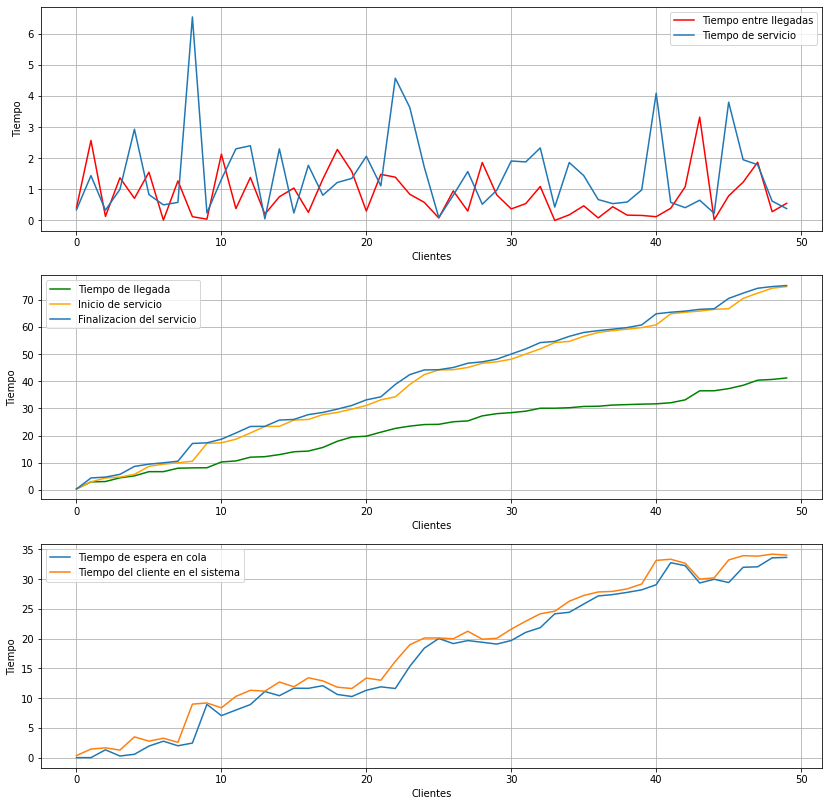

In [ ]:

plt.figure(figsize=(14,14))

plt.subplot(311)
plt.plot(T_entre_Llegadas_G, color= 'red', label='Tiempo entre llegadas')
plt.plot(T_de_Servicio_G, label='Tiempo de servicio')
plt.ylabel('Tiempo')
plt.xlabel('Clientes')
plt.legend()
plt.grid(True)

plt.subplot(312)
plt.plot(T_llegada, color='green', label='Tiempo de llegada')
plt.plot(Inicio_T_servicio, color='orange', label='Inicio de servicio')
plt.plot(Final_T_Servicio, label='Finalizacion del servicio')
plt.xlabel('Clientes')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)

plt.subplot(313)

plt.plot(T_Espera_en_Cola, label='Tiempo de espera en cola')
plt.plot(T_Cliente_en_Sistema, label='Tiempo del cliente en el sistema')
plt.xlabel('Clientes')
plt.ylabel('Tiempo')
plt.legend()
plt.grid(True)

plt.show()

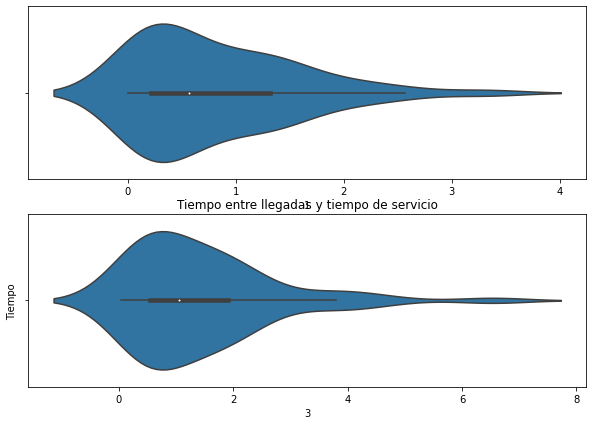

In [ ]:
 
datas = pd.DataFrame.transpose(pd.DataFrame(data))
fig, ax = plt.subplots(2)
plt.title('Tiempo entre llegadas y tiempo de servicio')
plt.ylabel('Tiempo')
plt.xlabel('Clientes')
fig.set_size_inches(10, 7)

sns.violinplot(x = 1, data = datas, kind = "violin", inner = "box", ax = ax[0]);
sns.violinplot(x = 3, data = datas, kind = "violin", inner = "box", ax = ax[1]);

